In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ensembles = [
    Ensemble("PED00156e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.top.pdb'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

featurization_params = {'featurization': "phi_psi"}
reduce_dim_params = {'method': "dimenfix", 'range_n_clusters':[2, 3, 4, 5, 6]}

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
analysis = EnsembleAnalysis(ensembles, data_dir)

analysis.load_trajectories()

PED00156e001
Trajectory already exists for ensemble PED00156e001. Loading trajectory.
PED00157e001
Trajectory already exists for ensemble PED00157e001. Loading trajectory.
PED00158e001
Trajectory already exists for ensemble PED00158e001. Loading trajectory.


In [4]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52'

{'PED00156e001': array([[0.62181395, 0.8748281 , 1.0244368 , ..., 0.5381905 , 0.65995586,
         0.5500405 ],
        [0.6740468 , 0.94238734, 1.2103361 , ..., 0.696765  , 0.7199101 ,
         0.5397694 ],
        [0.54331213, 0.5967415 , 0.8770647 , ..., 0.6101002 , 0.9751156 ,
         0.68294644],
        ...,
        [0.69683045, 0.88360864, 1.1769351 , ..., 0.5458644 , 0.8227767 ,
         0.53999794],
        [0.58550507, 0.8509589 , 1.0959796 , ..., 0.5325418 , 0.539001  ,
         0.63170296],
        [0.5536332 , 0.6240836 , 0.865476  , ..., 0.65317243, 0.5724018 ,
         0.5386198 ]], dtype=float32),
 'PED00157e001': array([[0.5444462 , 0.7421228 , 0.8755765 , ..., 0.6166486 , 0.8442986 ,
         0.689368  ],
        [0.61922514, 0.89435095, 0.93977153, ..., 0.7174825 , 0.85039765,
         0.5540449 ],
        [0.69710505, 1.0575799 , 1.2049499 , ..., 0.57521105, 0.84521836,
         0.6335973 ],
        ...,
        [0.5811551 , 0.5352497 , 0.58276105, ..., 0.6435778 ,

In [5]:
analysis.reduce_features(method='umap')

For n_clusters = 2 The average silhouette_score is : 0.5092378
For n_clusters = 3 The average silhouette_score is : 0.5612485
For n_clusters = 4 The average silhouette_score is : 0.53603864
For n_clusters = 5 The average silhouette_score is : 0.53085107
For n_clusters = 6 The average silhouette_score is : 0.51995844
For n_clusters = 7 The average silhouette_score is : 0.5109377
For n_clusters = 8 The average silhouette_score is : 0.5203338
For n_clusters = 9 The average silhouette_score is : 0.50759655


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446

array([[ 0.90035224,  3.338215  ],
       [ 0.5211666 ,  2.8890772 ],
       [ 0.75810933,  2.8853848 ],
       [ 1.3666536 ,  2.5849986 ],
       [ 0.69632906,  2.414739  ],
       [ 0.6383472 ,  3.2907436 ],
       [ 0.62442267,  3.5258155 ],
       [ 1.2081637 ,  3.4206748 ],
       [ 5.816819  ,  0.64550877],
       [ 0.8578855 ,  3.1245441 ],
       [ 1.0144373 ,  3.59576   ],
       [ 0.62642986,  2.2661169 ],
       [ 1.6854173 ,  2.5059752 ],
       [ 0.5813975 ,  2.458338  ],
       [ 0.8006079 ,  3.6354325 ],
       [ 0.61001277,  2.597761  ],
       [ 1.2623192 ,  2.714482  ],
       [ 0.5942082 ,  2.5418212 ],
       [ 0.745319  ,  3.675097  ],
       [ 1.6667911 ,  3.0934262 ],
       [ 1.311513  ,  2.7824888 ],
       [ 3.0777073 ,  3.8527598 ],
       [ 0.5867342 ,  3.4278705 ],
       [ 3.5474088 ,  3.594517  ],
       [ 4.3636727 ,  3.6397107 ],
       [ 3.486888  ,  3.676605  ],
       [ 1.2565697 ,  3.820435  ],
       [ 3.2276006 ,  4.2280912 ],
       [ 2.105205  ,

array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (Rg labels)'}>], dtype=object)

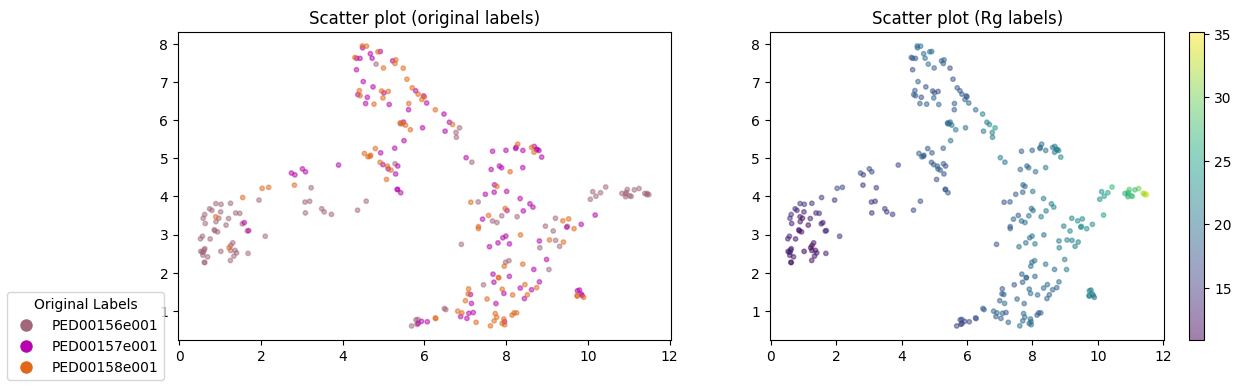

In [6]:
vis = Visualization(analysis)
vis.umap_scatter()